In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

In [2]:
from problem import NS_steady_2d
from model import PDE_basis, TrainLS
from my_utils import plot_2d_tri, plot_domain_2d

***************************************************
NS_steady (case=None):
	x_pde:   	(2500, 2)
	x_bd:    	(200, 2)
	x_ic:    	None
	x_test:    	(12321, 2)
***************************************************
div rmse:	 6.815237330848614e-17
pde_u rmse:	 1.1255337781420084e-15
pde_v rmse:	 1.6852282162775636e-16


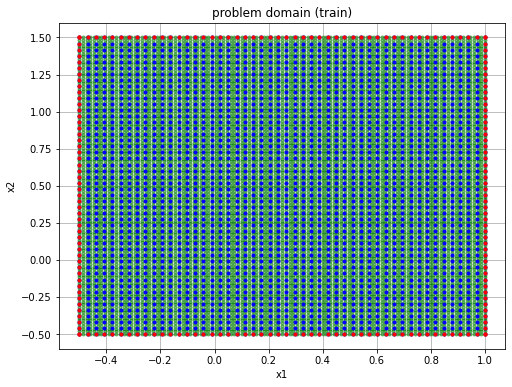

In [3]:
data = np.load('data/data.npz',allow_pickle=True)
my_prob = NS_steady_2d(data=data)

print(my_prob)
x,u = my_prob.check_solution()

plot_domain_2d(x_pde=my_prob.x_pde, x_bd=my_prob.x_bd, x_test=my_prob.x_test)

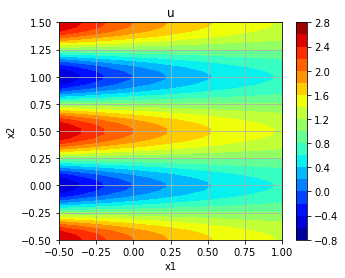

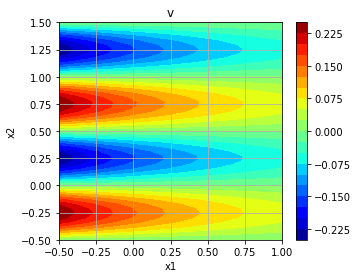

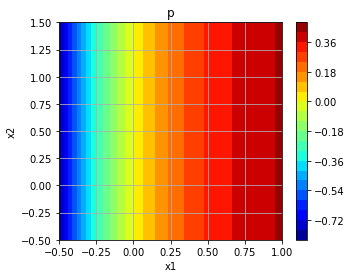

In [4]:
for var in my_prob.out_var:
    plot_2d_tri(x[:,0], x[:,1], u[var][:,0], title=var, equal_ratio=False,figsize=(5,4))

In [5]:
basis_num_vec = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
shape_vec = [1, 1, 1, 1.5, 1.5,  1.5, 2, 2, 2, 2]
print(len(shape_vec))
print(len(basis_num_vec))
max_iter = 20

10
10


In [6]:
temp_mse = []
for i in range(10):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=2, basis_num=basis_num)
    basis.init_pde_basis(shape=shape_vec[i], radius=1.5)
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef, info1 = train_ls.ls_pde_picard(max_iter=max_iter, weights=None, verbose=False)

    mse_test, info2 = train_ls.get_mse_test(coef)
    print(basis_num,'Test MSE:', mse_test)
    temp_mse.append(mse_test)

#
mse_pde = np.array(temp_mse)

100 Test MSE: 0.014040801365502844
200 Test MSE: 1.2905692093521885e-10
300 Test MSE: 5.210905734345843e-13
400 Test MSE: 1.1181367823796728e-14
500 Test MSE: 8.699899299176667e-16
600 Test MSE: 2.1960675891439035e-16
700 Test MSE: 1.1831882838641006e-17
800 Test MSE: 1.848707738189021e-17
900 Test MSE: 8.113200501169582e-18
1000 Test MSE: 7.145011411527877e-18


In [7]:
# basis.init_dnn(init_type='default')

temp_mse = []
for i in range(10):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=2, basis_num=basis_num)
    basis.init_dnn(init_type='default')
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef, info1 = train_ls.ls_pde_picard(max_iter=max_iter, weights=None, verbose=False)

    mse_test, info2 = train_ls.get_mse_test(coef)
    print(basis_num,'Test MSE:', mse_test)
    temp_mse.append(mse_test)


#
mse_dnn_default = np.array(temp_mse)


100 Test MSE: 0.029357471839495716
200 Test MSE: 7.29754926067138e-07
300 Test MSE: 3.509464689435558e-08
400 Test MSE: 1.782524104600083e-08
500 Test MSE: 5.717278680103315e-09
600 Test MSE: 8.450220644235358e-10
700 Test MSE: 9.02157744496165e-08
800 Test MSE: 5.571055677954971e-08
900 Test MSE: 2.2722905382963063e-10
1000 Test MSE: 2.436287549143964e-08


In [10]:
df = pd.DataFrame({'basis_num': basis_num_vec,
                   'mse_dnn_default': mse_dnn_default,
                   'mse_pde_basis': mse_pde})
df.to_csv(f'ls.csv',header=True, index=False, encoding='utf-8')


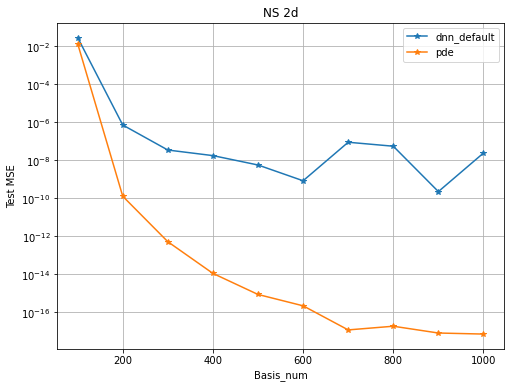

In [11]:
plt.figure(figsize=(8,6))
plt.plot(basis_num_vec, mse_dnn_default,'*-' ,label='dnn_default')
plt.plot(basis_num_vec, mse_pde,'*-', label='pde')
plt.yscale('log')
plt.legend()
plt.title('NS 2d')
plt.grid(which='both')
plt.xlabel('Basis_num')
plt.ylabel('Test MSE')
plt.show()


